# PREDICTIVE MODELLING part 2: second innings runs

This segment of the project focused on finding ways to predict the second innings total of the team batting second while chasing the target runs 

The match data of 55 matches played in the 2020 and 2021 seasons were used in training machine learning models. The performance of these models was then evaluated by using them to predict the second innings runs totals of the 16 matches that have already been played for 2022 season as on 23rd July. The predicted results were then validated with the actual outcomes to understand how close the predictions have been. 

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 <h2 align="center">Predicting second innings runs based on team batting and bowling scores</h2>

The feature variables were the defending team’s bowling score, the chasing team’s batting score, the target runs set by the previous batting team in the first innings and the names of the playing teams. One-hot encoding was applied to the categorical features such as the team names. The aim was to see how well the actual runs total of the second innings could be predicted from the given features. 

#### Prepare data for modelling

In [2]:
matches_runswickets=pd.read_csv("C:\\Users\\DELL\\Cricdata\\matches_runswickets.csv")

In [3]:
matches_runswickets.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner,Team1_total_runs,Team2_total_runs,DLS
0,1229326,Sunrisers,0.373338,0.237332,Southern Vipers,0.457667,0.623696,Southern Vipers,202,208,No
1,1229327,Central Sparks,0.533351,0.400001,Northern Diamonds,0.473784,0.681205,Northern Diamonds,144,145,No
2,1229328,Thunder,0.390954,0.447815,Lightning,0.509764,0.449314,Thunder,150,146,Yes
3,1229329,South East Stars,0.394519,0.350230,Western Storm,0.466641,0.301627,Western Storm,166,167,No
4,1229330,Southern Vipers,0.457667,0.623696,Western Storm,0.455859,0.294994,Southern Vipers,261,239,No


In [4]:
matches_runswickets = matches_runswickets.drop(['match_id','Winner','DLS'],axis=1)
matches_runswickets['Run_target']=matches_runswickets['Team1_total_runs']+1
matches_runswickets.reset_index(drop=True,inplace=True)
matches_runswickets.head()

,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Team1_total_runs,Team2_total_runs,Run_target
0,Sunrisers,0.373338,0.237332,Southern Vipers,0.457667,0.623696,202,208,203
1,Central Sparks,0.533351,0.400001,Northern Diamonds,0.473784,0.681205,144,145,145
2,Thunder,0.390954,0.447815,Lightning,0.509764,0.449314,150,146,151
3,South East Stars,0.394519,0.350230,Western Storm,0.466641,0.301627,166,167,167
4,Southern Vipers,0.457667,0.623696,Western Storm,0.455859,0.294994,261,239,262


In [5]:
matches_secondinnings = matches_runswickets[['Team1','Team2','Team2_batting_score',
                                             'Team1_bowling_score','Run_target','Team2_total_runs']]
matches_secondinnings.head()

,Team1,Team2,Team2_batting_score,Team1_bowling_score,Run_target,Team2_total_runs
0,Sunrisers,Southern Vipers,0.457667,0.237332,203,208
1,Central Sparks,Northern Diamonds,0.473784,0.400001,145,145
2,Thunder,Lightning,0.509764,0.447815,151,146
3,South East Stars,Western Storm,0.466641,0.350230,167,167
4,Southern Vipers,Western Storm,0.455859,0.623696,262,239


In [6]:
#form dummy variables for Team1 and Team2
matches_secondinnings = pd.get_dummies(matches_secondinnings, prefix=['Team1_', 'Team2_'], columns=['Team1', 'Team2'])

In [7]:
X = matches_secondinnings.drop('Team2_total_runs',axis=1)
y = matches_secondinnings[['Team2_total_runs']]

In [8]:
X.shape

(55, 19)

In [9]:
y.shape

(55, 1)

In [10]:
X.columns

Index(['Team2_batting_score', 'Team1_bowling_score', 'Run_target',
       'Team1__Central Sparks', 'Team1__Lightning', 'Team1__Northern Diamonds',
       'Team1__South East Stars', 'Team1__Southern Vipers', 'Team1__Sunrisers',
       'Team1__Thunder', 'Team1__Western Storm', 'Team2__Central Sparks',
       'Team2__Lightning', 'Team2__Northern Diamonds',
       'Team2__South East Stars', 'Team2__Southern Vipers', 'Team2__Sunrisers',
       'Team2__Thunder', 'Team2__Western Storm'],
      dtype='object')

#### Prepare 2022 validation data

In [11]:
matches_runswickets2022=pd.read_csv("C:\\Users\\DELL\\Cricdata\\matches_runswickets2022.csv")
matches_runswickets2022.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner,Team1_total_runs,Team2_total_runs,DLS
0,202201,Central Sparks,0.433825,0.434761,Southern Vipers,0.475676,0.580835,Southern Vipers,69,75,Yes
1,202202,South East Stars,0.375115,0.349223,Sunrisers,0.324267,0.210783,South East Stars,281,201,No
2,202203,Western Storm,0.477618,0.297776,Lightning,0.476237,0.391991,Western Storm,241,166,Yes
3,202204,Thunder,0.289146,0.503731,Northern Diamonds,0.439798,0.600177,Northern Diamonds,235,241,No
4,202205,Central Sparks,0.433825,0.434761,Western Storm,0.441739,0.249514,Central Sparks,206,184,No


In [12]:
matches_runswickets2022['Run_target']=matches_runswickets2022['Team1_total_runs']+1
matches_runswickets2022.reset_index(drop=True,inplace=True)
matches_runswickets2022.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner,Team1_total_runs,Team2_total_runs,DLS,Run_target
0,202201,Central Sparks,0.433825,0.434761,Southern Vipers,0.475676,0.580835,Southern Vipers,69,75,Yes,70
1,202202,South East Stars,0.375115,0.349223,Sunrisers,0.324267,0.210783,South East Stars,281,201,No,282
2,202203,Western Storm,0.477618,0.297776,Lightning,0.476237,0.391991,Western Storm,241,166,Yes,242
3,202204,Thunder,0.289146,0.503731,Northern Diamonds,0.439798,0.600177,Northern Diamonds,235,241,No,236
4,202205,Central Sparks,0.433825,0.434761,Western Storm,0.441739,0.249514,Central Sparks,206,184,No,207


In [13]:
matches_secondinnings2022 = matches_runswickets2022[['Team1','Team2','Team2_batting_score',
                                             'Team1_bowling_score','Run_target','Team2_total_runs']]
matches_secondinnings2022.head()

,Team1,Team2,Team2_batting_score,Team1_bowling_score,Run_target,Team2_total_runs
0,Central Sparks,Southern Vipers,0.475676,0.434761,70,75
1,South East Stars,Sunrisers,0.324267,0.349223,282,201
2,Western Storm,Lightning,0.476237,0.297776,242,166
3,Thunder,Northern Diamonds,0.439798,0.503731,236,241
4,Central Sparks,Western Storm,0.441739,0.434761,207,184


In [14]:
#form dummy variables for Team1 and Team2
matches_secondinnings2022 = pd.get_dummies(matches_secondinnings2022, prefix=['Team1_', 'Team2_'], columns=['Team1', 'Team2'])
# Separate X and y sets
X_2022 = matches_secondinnings2022.drop('Team2_total_runs',axis=1)

y_2022 = matches_secondinnings2022[['Team2_total_runs']]

In [15]:
X_2022.shape

(16, 19)

In [16]:
X_2022.columns

Index(['Team2_batting_score', 'Team1_bowling_score', 'Run_target',
       'Team1__Central Sparks', 'Team1__Lightning', 'Team1__Northern Diamonds',
       'Team1__South East Stars', 'Team1__Southern Vipers', 'Team1__Sunrisers',
       'Team1__Thunder', 'Team1__Western Storm', 'Team2__Central Sparks',
       'Team2__Lightning', 'Team2__Northern Diamonds',
       'Team2__South East Stars', 'Team2__Southern Vipers', 'Team2__Sunrisers',
       'Team2__Thunder', 'Team2__Western Storm'],
      dtype='object')

#### Modelling

<h4 align="center">Linear Regression and Ridge Regression functions</h4>

This was a case of regression problem and as the dataset is small, simple models like Linear Regression and Ridge Regression models were used. Linear Regression is the simplest machine learning algorithm where the relation between the target and the feature variables is determined by fitting a straight line through the data points, that represents a linear equation for the relationship.Ridge Regression is a modification of the Linear Regression algorithm that has the capability to handle issues like data overfitting and multicollinearity of feature variables. 

In [17]:
def LinReg_model_function(X,y,testsize):
    #import relevant libraries and packages
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.model_selection import cross_val_score   
    from sklearn.metrics import r2_score, mean_squared_error
    
    #perform train test split based on specified 'testsize'
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=42)
    
    #train the model
    model=linear_model.LinearRegression()
    model.fit(X_train,y_train)
    
    #make predictions for test data
    y_pred = model.predict(X_test).astype(int)
    
    #print accuracies and errors 
    print("-------Linear Regression--------")
    print("Test Size: ",'%.1f'%(testsize*100))
    print("Test Accuracy: ",'%.2f'%(r2_score(y_test, y_pred)*100))
    print(f"Cross-Validated Accuracy:{np.mean(cross_val_score(model, X, y, cv=3))*100:.2f}%")
    print("RMSE:%.2f" %np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return model 

In [18]:
def RidgeReg_model_function(X,y,testsize):
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.model_selection import cross_val_score   
    from sklearn.metrics import r2_score, mean_squared_error
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=42)
    
    model=linear_model.Ridge(alpha=1.0)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test).astype(int)
    
    print("-------Ridge Regression--------")
    print("Test Size: ",'%.1f'%(testsize*100))
    print("Test Accuracy: ",'%.2f'%(r2_score(y_test, y_pred)*100))
    print(f"Cross-Validated Accuracy:{np.mean(cross_val_score(model, X, y, cv=3))*100:.2f}%")
    print("RMSE:%.2f" %np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return model

The input data set were split into train and test sets in different ratios for different versions of each model. Cross validation was applied on the train-test versions of the model where the splitting of the dataset was done at different points. The features and target variables of the train sets were used to fit the model. Then predictions were made on the target variables of the test set which was then evaluated with the actual values.

In [19]:
SecondInningsScore_LR=LinReg_model_function(X,y,0.15)
SecondInningsScore_LR2=LinReg_model_function(X,y,0.2)
SecondInningsScore_LR3=LinReg_model_function(X,y,0.1)

SecondInningsScore_RR=RidgeReg_model_function(X,y,0.15)
SecondInningsScore_RR2=RidgeReg_model_function(X,y,0.2)
SecondInningsScore_RR3=RidgeReg_model_function(X,y,0.1)

-------Linear Regression--------
Test Size:  15.0
Test Accuracy:  79.08
Cross-Validated Accuracy:22.78%
RMSE:21.42
-------Linear Regression--------
Test Size:  20.0
Test Accuracy:  75.74
Cross-Validated Accuracy:22.78%
RMSE:22.70
-------Linear Regression--------
Test Size:  10.0
Test Accuracy:  92.16
Cross-Validated Accuracy:22.78%
RMSE:12.79
-------Ridge Regression--------
Test Size:  15.0
Test Accuracy:  83.37
Cross-Validated Accuracy:43.31%
RMSE:19.10
-------Ridge Regression--------
Test Size:  20.0
Test Accuracy:  80.56
Cross-Validated Accuracy:43.31%
RMSE:20.32
-------Ridge Regression--------
Test Size:  10.0
Test Accuracy:  92.00
Cross-Validated Accuracy:43.31%
RMSE:12.92


<h4 align="center">Linear Regression and Ridge Regression functions (bootstrap sampled)</h4>

A bootstrapped sampled version for each model was also created after getting trained on bootstrap sampled versions of the whole input data.

In [20]:
def LinReg_model_function_boots(X,y,n_rep):
    from sklearn import linear_model
      
    #combine X and y to replicate the original dataframe
    df = pd.concat([X, y], axis=1) 
    
    for i in range(n_rep):      
        #sample the datframe with repetitions of rows allowed and create new larger dataframe
        df_new = df.sample(n=len(df)+i, replace=True, random_state=42+i)     
        #split the new dataframe into X_new and y_new for features and targets respectively
        X_new = df_new.drop('Team2_total_runs',axis=1)
        y_new = df_new['Team2_total_runs']
               
        #train the model with the new larger dataset
        model=linear_model.LinearRegression()
        model.fit(X_new,y_new)

    return model

In [21]:
def RidgeReg_model_function_boots(X,y,n_rep):
    from sklearn import linear_model
       
    #combine X and y to replicate the original dataframe
    df = pd.concat([X, y], axis=1) 
    
    for i in range(n_rep):
        
        #sample the datframe with repetitions of rows allowed and create new larger dataframe
        df_new = df.sample(n=len(df)+i, replace=True, random_state=42+i)     
        #split the test dataframe into X_new and y_new for features and targets respectively
        X_new = df_new.drop('Team2_total_runs',axis=1)
        y_new = df_new['Team2_total_runs']
               
        #train the model with the new larger dataset
        model=linear_model.Ridge(alpha=1.0)
        model.fit(X_new,y_new)

    return model

In [53]:
SecondInningsScore_LR_boots = LinReg_model_function_boots(X,y,100)
SecondInningsScore_RR_boots = RidgeReg_model_function_boots(X,y,100)

#### Check how the models works by analysing with the 2022 matches

The models were used to predict the second innings runs of the 2022 matches and then the predicted run totals were compared with the actual ones.

In [54]:
y_pred2022_LR1 = SecondInningsScore_LR.predict(X_2022).astype(int)
y_pred2022_LR2 = SecondInningsScore_LR2.predict(X_2022).astype(int)
y_pred2022_LR3 = SecondInningsScore_LR3.predict(X_2022).astype(int)
y_pred2022_LR_boots = SecondInningsScore_LR_boots.predict(X_2022).astype(int)

In [55]:
y_pred2022_RR1 = SecondInningsScore_RR.predict(X_2022).astype(int)
y_pred2022_RR2 = SecondInningsScore_RR2.predict(X_2022).astype(int)
y_pred2022_RR3 = SecondInningsScore_RR3.predict(X_2022).astype(int)
y_pred2022_RR_boots = SecondInningsScore_RR_boots.predict(X_2022).astype(int)

In [56]:
from sklearn.metrics import mean_squared_error

print("Validation MSE LR:%.2f" % mean_squared_error(y_2022, y_pred2022_LR1))
print("Validation MSE LR v2:%.2f" % mean_squared_error(y_2022, y_pred2022_LR2))
print("Validation MSE LR v3:%.2f" % mean_squared_error(y_2022, y_pred2022_LR3))
print("Validation MSE LR boots:%.2f" % mean_squared_error(y_2022, y_pred2022_LR_boots))

print("Validation MSE RR:%.2f" % mean_squared_error(y_2022, y_pred2022_RR1))
print("Validation MSE RR v2:%.2f" % mean_squared_error(y_2022, y_pred2022_RR2))
print("Validation MSE RR v3:%.2f" % mean_squared_error(y_2022, y_pred2022_RR3))
print("Validation MSE RR boots:%.2f" % mean_squared_error(y_2022, y_pred2022_RR_boots))

Validation MSE LR:1265.75
Validation MSE LR v2:1379.38
Validation MSE LR v3:1088.69
Validation MSE LR boots:1091.62
Validation MSE RR:822.00
Validation MSE RR v2:820.50
Validation MSE RR v3:788.00
Validation MSE RR boots:638.69


In [57]:
predictions2022_v1 = pd.DataFrame(data={"match_id":matches_runswickets2022['match_id'],
                                     "Team1":matches_runswickets2022['Team1'],
                                     "Team2":matches_runswickets2022['Team2'],
                                     "Target":X_2022['Run_target'],
                                     "Team2 Actual Runs":y_2022['Team2_total_runs'],
                                     "Predicted Runs LR":y_pred2022_LR1.flatten(),
                                     "Predicted Runs LR v2":y_pred2022_LR2.flatten(),
                                     "Predicted Runs LR v3":y_pred2022_LR3.flatten(),
                                     "Predicted Runs LR boots":y_pred2022_LR_boots.flatten(),
                                     "Predicted Runs RR":y_pred2022_RR1.flatten(),
                                     "Predicted Runs RR v2":y_pred2022_RR2.flatten(),
                                     "Predicted Runs RR v3":y_pred2022_RR3.flatten(),
                                     "Predicted Runs RR boots":y_pred2022_RR_boots.flatten()})

In [58]:
predictions2022_v1

,match_id,Team1,Team2,Target,Team2 Actual Runs,Predicted Runs LR,Predicted Runs LR v2,Predicted Runs LR v3,Predicted Runs LR boots,Predicted Runs RR,Predicted Runs RR v2,Predicted Runs RR v3,Predicted Runs RR boots
0,202201,Central Sparks,Southern Vipers,70,75,74,74,67,81,68,67,62,70
1,202202,South East Stars,Sunrisers,282,201,217,217,216,211,223,224,223,217
2,202203,Western Storm,Lightning,242,166,216,215,213,198,212,212,211,198
3,202204,Thunder,Northern Diamonds,236,241,194,190,205,199,209,208,218,214
4,202205,Central Sparks,Western Storm,207,184,181,181,184,189,179,179,183,188
5,202206,Northern Diamonds,Sunrisers,195,188,169,174,167,189,166,165,164,182
6,202207,Thunder,Lightning,239,241,183,180,193,177,192,192,199,184
7,202208,Southern Vipers,South East Stars,307,173,265,272,260,258,233,232,234,228
8,202209,Central Sparks,Northern Diamonds,215,215,198,199,198,204,188,187,188,190
9,202210,South East Stars,Thunder,199,146,127,132,122,106,141,147,137,122


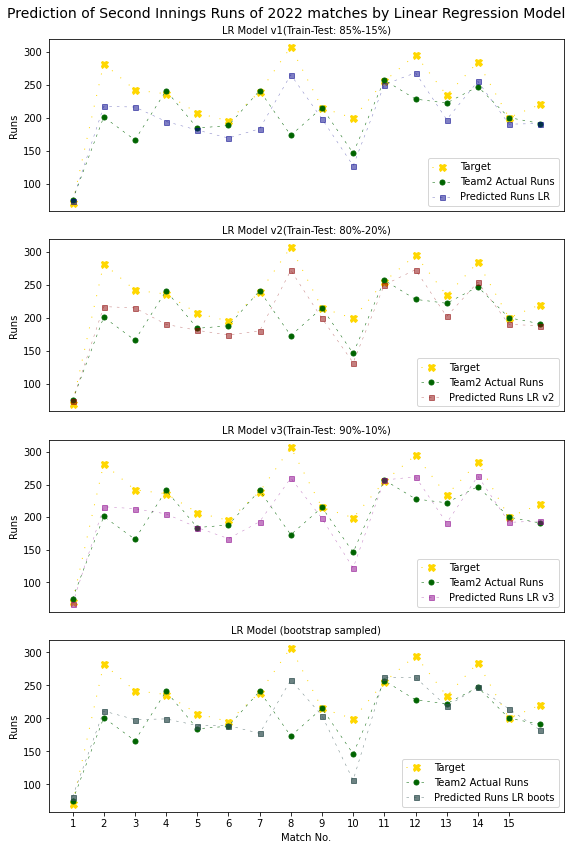

In [59]:
fig, ax =plt.subplots(4,1,figsize=(8,12))
fig.suptitle('Prediction of Second Innings Runs of 2022 matches by Linear Regression Model', fontsize=14)

ax[0].set_title('LR Model v1(Train-Test: 85%-15%)',
                fontsize=10)
ax[0].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[0].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[0].plot('match_id','Predicted Runs LR',data=predictions2022_v1,label="Predicted Runs LR",
         marker='s',markersize=5, color='darkblue',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[0].legend()
ax[0].set(ylabel="Runs")
ax[0].get_xaxis().set_visible(False)


ax[1].set_title('LR Model v2(Train-Test: 80%-20%)',
                fontsize=10)
ax[1].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[1].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[1].plot('match_id','Predicted Runs LR v2',data=predictions2022_v1,label="Predicted Runs LR v2",
         marker='s',markersize=5, color='darkred',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[1].legend()
ax[1].set(ylabel="Runs")
ax[1].get_xaxis().set_visible(False)


ax[2].set_title('LR Model v3(Train-Test: 90%-10%)',
                fontsize=10)
ax[2].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[2].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[2].plot('match_id','Predicted Runs LR v3',data=predictions2022_v1,label="Predicted Runs LR v3",
         marker='s',markersize=5, color='darkmagenta',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[2].legend()
ax[2].set(ylabel="Runs")
ax[2].get_xaxis().set_visible(False)

ax[3].set_title('LR Model (bootstrap sampled)',fontsize=10)
ax[3].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[3].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[3].plot('match_id','Predicted Runs LR boots',data=predictions2022_v1,label="Predicted Runs LR boots",
         marker='s',markersize=5, color='darkslategray',linewidth=0.5,alpha=0.7,linestyle=(0, (5, 10)))
ax[3].legend()

ax[3].set(xlabel="Match No.",ylabel="Runs")
ax[3].set_xticks(np.arange(202201,202216,1))
ax[3].set_xticklabels([i for i in range(1,16)])

plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/PredLRmodelv1.jpeg',bbox_inches='tight')
plt.show()

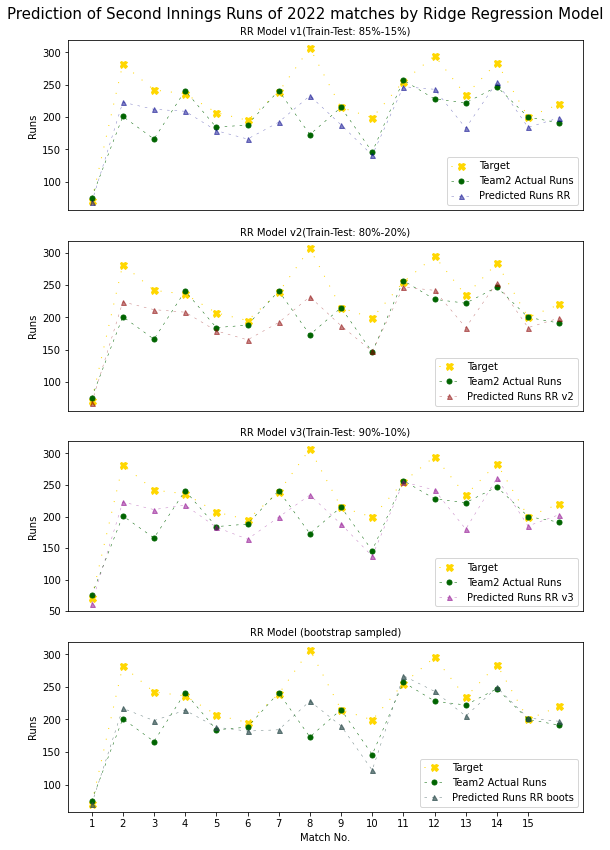

In [60]:
fig, ax =plt.subplots(4,1,figsize=(8,12))
fig.suptitle('Prediction of Second Innings Runs of 2022 matches by Ridge Regression Model', fontsize=10)

ax[0].set_title('RR Model v1(Train-Test: 85%-15%)',
                fontsize=10)
ax[0].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[0].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[0].plot('match_id','Predicted Runs RR',data=predictions2022_v1,label="Predicted Runs RR",
         marker='^',markersize=5, color='darkblue',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[0].legend()
ax[0].set(ylabel="Runs")
ax[0].get_xaxis().set_visible(False)


ax[1].set_title('RR Model v2(Train-Test: 80%-20%)',
                fontsize=10)
ax[1].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[1].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[1].plot('match_id','Predicted Runs RR v2',data=predictions2022_v1,label="Predicted Runs RR v2",
         marker='^',markersize=5, color='darkred',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[1].legend()
ax[1].set(ylabel="Runs")
ax[1].get_xaxis().set_visible(False)


ax[2].set_title('RR Model v3(Train-Test: 90%-10%)',
                fontsize=10)
ax[2].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[2].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[2].plot('match_id','Predicted Runs RR v3',data=predictions2022_v1,label="Predicted Runs RR v3",
         marker='^',markersize=5, color='darkmagenta',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[2].legend()
ax[2].set(ylabel="Runs")
ax[2].get_xaxis().set_visible(False)

fig.suptitle('Prediction of Second Innings Runs of 2022 matches by Ridge Regression Model', fontsize=15)
ax[3].set_title('RR Model (bootstrap sampled)',fontsize=10)
ax[3].plot('match_id','Target',data=predictions2022_v1,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[3].plot('match_id','Team2 Actual Runs',data=predictions2022_v1,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[3].plot('match_id','Predicted Runs RR boots',data=predictions2022_v1,label="Predicted Runs RR boots",
         marker='^',markersize=5, color='darkslategray',linewidth=0.5,alpha=0.7,linestyle=(0, (5, 10)))
ax[3].legend()
ax[3].set(xlabel="Match No.",ylabel="Runs")
ax[3].set_xticks(np.arange(202201,202216,1))
ax[3].set_xticklabels([i for i in range(1,16)])

plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/PredRRmodelv1.jpeg',bbox_inches='tight')
plt.show()

Most of the time, the predictions have been far-off. When the second innings runs exceeded the target runs, then that batting team won the match. Many of the predictions gave the wrong notion that the team had lost while the team had actually won and vice versa. The models’ predictions were misleading in most of the situations when the batting team won the match. 

 <h2 align="center"> Predicting second innings score (with knowledge of first 10 over runs) </h2>

In this approach instead of scores, the runs scored and wickets lost by the batting team in the first 10 overs of the second innings were used as feature variables along with the target runs and team names.

In [3]:
matches_runswickets_v2=pd.read_csv("C:\\Users\\DELL\\Cricdata\\matches_runswickets_v2.csv")

In [4]:
matches_runswickets_v2.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner,Team1_total_runs,Team2_total_runs,Team2_runs_10overs,Team2_wickets_10overs,DLS
0,1229326,Sunrisers,0.373338,0.237332,Southern Vipers,0.457667,0.623696,Southern Vipers,202,208,69.0,0.0,No
1,1229327,Central Sparks,0.533351,0.400001,Northern Diamonds,0.473784,0.681205,Northern Diamonds,144,145,52.0,0.0,No
2,1229328,Thunder,0.390954,0.447815,Lightning,0.509764,0.449314,Thunder,150,146,33.0,1.0,Yes
3,1229329,South East Stars,0.394519,0.350230,Western Storm,0.466641,0.301627,Western Storm,166,167,35.0,0.0,No
4,1229330,Southern Vipers,0.457667,0.623696,Western Storm,0.455859,0.294994,Southern Vipers,261,239,53.0,1.0,No


In [5]:
matches_runswickets_v2 = matches_runswickets_v2[matches_runswickets_v2['Team2_runs_10overs'].notnull()]
matches_runswickets_v2 = matches_runswickets_v2.drop(['match_id','Winner','DLS'],axis=1)
matches_runswickets_v2['Run_target']=matches_runswickets_v2['Team1_total_runs']+1
matches_runswickets_v2['Team2_wickets_10overs']=matches_runswickets_v2['Team2_wickets_10overs'].astype('Int64')
matches_runswickets_v2.reset_index(drop=True,inplace=True)
matches_runswickets_v2.head()

,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Team1_total_runs,Team2_total_runs,Team2_runs_10overs,Team2_wickets_10overs,Run_target
0,Sunrisers,0.373338,0.237332,Southern Vipers,0.457667,0.623696,202,208,69.0,0,203
1,Central Sparks,0.533351,0.400001,Northern Diamonds,0.473784,0.681205,144,145,52.0,0,145
2,Thunder,0.390954,0.447815,Lightning,0.509764,0.449314,150,146,33.0,1,151
3,South East Stars,0.394519,0.350230,Western Storm,0.466641,0.301627,166,167,35.0,0,167
4,Southern Vipers,0.457667,0.623696,Western Storm,0.455859,0.294994,261,239,53.0,1,262


In [6]:
matches_secondinnings_v2 = matches_runswickets_v2[['Team1','Team2','Run_target',
                                                   'Team2_runs_10overs','Team2_wickets_10overs','Team2_total_runs']]
matches_secondinnings_v2.head()

,Team1,Team2,Run_target,Team2_runs_10overs,Team2_wickets_10overs,Team2_total_runs
0,Sunrisers,Southern Vipers,203,69.0,0,208
1,Central Sparks,Northern Diamonds,145,52.0,0,145
2,Thunder,Lightning,151,33.0,1,146
3,South East Stars,Western Storm,167,35.0,0,167
4,Southern Vipers,Western Storm,262,53.0,1,239


In [7]:
#form dummy variables for Team1 and Team2
matches_secondinnings_v2 = pd.get_dummies(matches_secondinnings_v2, prefix=['Team1_', 'Team2_'], columns=['Team1', 'Team2'])

In [8]:
X1 = matches_secondinnings_v2.drop('Team2_total_runs',axis=1)
y1 = matches_secondinnings_v2[['Team2_total_runs']]

In [9]:
X1.shape

(54, 19)

In [37]:
X1.columns

Index(['Run_target', 'Team2_runs_10overs', 'Team2_wickets_10overs',
       'Team1__Central Sparks', 'Team1__Lightning', 'Team1__Northern Diamonds',
       'Team1__South East Stars', 'Team1__Southern Vipers', 'Team1__Sunrisers',
       'Team1__Thunder', 'Team1__Western Storm', 'Team2__Central Sparks',
       'Team2__Lightning', 'Team2__Northern Diamonds',
       'Team2__South East Stars', 'Team2__Southern Vipers', 'Team2__Sunrisers',
       'Team2__Thunder', 'Team2__Western Storm'],
      dtype='object')

#### Prepare 2022 validation data

In [10]:
matches_runswickets2022_v2=pd.read_csv("C:\\Users\\DELL\\Cricdata\\matches_runswickets2022_v2.csv")

In [11]:
matches_runswickets2022_v2.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner,Team1_total_runs,Team2_total_runs,Team2_runs_10overs,Team2_wickets_10overs,DLS
0,202201,Central Sparks,0.433825,0.434761,Southern Vipers,0.475676,0.580835,Southern Vipers,69,75,75,3,Yes
1,202202,South East Stars,0.375115,0.349223,Sunrisers,0.324267,0.210783,South East Stars,281,201,59,1,No
2,202203,Western Storm,0.477618,0.297776,Lightning,0.476237,0.391991,Western Storm,241,166,36,3,Yes
3,202204,Thunder,0.289146,0.503731,Northern Diamonds,0.439798,0.600177,Northern Diamonds,235,241,56,1,No
4,202205,Central Sparks,0.433825,0.434761,Western Storm,0.441739,0.249514,Central Sparks,206,184,32,3,No


In [12]:
matches_runswickets2022_v2['Run_target']=matches_runswickets2022_v2['Team1_total_runs']+1
matches_runswickets2022_v2['Team2_wickets_10overs']=matches_runswickets2022_v2['Team2_wickets_10overs'].astype('Int64')
matches_runswickets2022_v2.reset_index(drop=True,inplace=True)
matches_runswickets2022_v2.head()

,match_id,Team1,Team1_batting_score,Team1_bowling_score,Team2,Team2_batting_score,Team2_bowling_score,Winner,Team1_total_runs,Team2_total_runs,Team2_runs_10overs,Team2_wickets_10overs,DLS,Run_target
0,202201,Central Sparks,0.433825,0.434761,Southern Vipers,0.475676,0.580835,Southern Vipers,69,75,75,3,Yes,70
1,202202,South East Stars,0.375115,0.349223,Sunrisers,0.324267,0.210783,South East Stars,281,201,59,1,No,282
2,202203,Western Storm,0.477618,0.297776,Lightning,0.476237,0.391991,Western Storm,241,166,36,3,Yes,242
3,202204,Thunder,0.289146,0.503731,Northern Diamonds,0.439798,0.600177,Northern Diamonds,235,241,56,1,No,236
4,202205,Central Sparks,0.433825,0.434761,Western Storm,0.441739,0.249514,Central Sparks,206,184,32,3,No,207


In [13]:
matches_secondinnings2022_v2 = matches_runswickets2022_v2[['Team1','Team2','Run_target',
                                                           'Team2_runs_10overs','Team2_wickets_10overs','Team2_total_runs']]
matches_secondinnings2022_v2.head()

,Team1,Team2,Run_target,Team2_runs_10overs,Team2_wickets_10overs,Team2_total_runs
0,Central Sparks,Southern Vipers,70,75,3,75
1,South East Stars,Sunrisers,282,59,1,201
2,Western Storm,Lightning,242,36,3,166
3,Thunder,Northern Diamonds,236,56,1,241
4,Central Sparks,Western Storm,207,32,3,184


In [42]:
#form dummy variables for Team1 and Team2
matches_secondinnings2022_v2 = pd.get_dummies(matches_secondinnings2022_v2, prefix=['Team1_', 'Team2_'], 
                                              columns=['Team1', 'Team2'])

In [43]:
X1_2022 = matches_secondinnings2022_v2.drop('Team2_total_runs',axis=1)
y1_2022 = matches_secondinnings2022_v2[['Team2_total_runs']]

In [44]:
X1_2022.shape

(16, 19)

In [45]:
X1_2022.columns

Index(['Run_target', 'Team2_runs_10overs', 'Team2_wickets_10overs',
       'Team1__Central Sparks', 'Team1__Lightning', 'Team1__Northern Diamonds',
       'Team1__South East Stars', 'Team1__Southern Vipers', 'Team1__Sunrisers',
       'Team1__Thunder', 'Team1__Western Storm', 'Team2__Central Sparks',
       'Team2__Lightning', 'Team2__Northern Diamonds',
       'Team2__South East Stars', 'Team2__Southern Vipers', 'Team2__Sunrisers',
       'Team2__Thunder', 'Team2__Western Storm'],
      dtype='object')

<h4 align="center">Linear Regression and Ridge Regression functions</h4>

In [46]:
SecondInningsScore_LR_v2=LinReg_model_function(X1,y1,0.25)
SecondInningsScore_LR2_v2=LinReg_model_function(X1,y1,0.2)
SecondInningsScore_LR3_v2=LinReg_model_function(X1,y1,0.1)

SecondInningsScore_RR_v2=RidgeReg_model_function(X1,y1,0.25)
SecondInningsScore_RR2_v2=RidgeReg_model_function(X1,y1,0.2)
SecondInningsScore_RR3_v2=RidgeReg_model_function(X1,y1,0.1)

-------Linear Regression--------
Test Size:  25.0
Test Accuracy:  49.51
Cross-Validated Accuracy:27.45%
RMSE:33.73
-------Linear Regression--------
Test Size:  20.0
Test Accuracy:  24.84
Cross-Validated Accuracy:27.45%
RMSE:34.41
-------Linear Regression--------
Test Size:  10.0
Test Accuracy:  45.54
Cross-Validated Accuracy:27.45%
RMSE:37.22
-------Ridge Regression--------
Test Size:  25.0
Test Accuracy:  50.32
Cross-Validated Accuracy:48.30%
RMSE:33.45
-------Ridge Regression--------
Test Size:  20.0
Test Accuracy:  30.02
Cross-Validated Accuracy:48.30%
RMSE:33.20
-------Ridge Regression--------
Test Size:  10.0
Test Accuracy:  49.05
Cross-Validated Accuracy:48.30%
RMSE:36.00


<h4 align="center">Linear Regression and Ridge Regression functions (bootstrap sampled)</h4>

In [61]:
SecondInningsScore_LR_boots_v2 = LinReg_model_function_boots(X1,y1,100)
SecondInningsScore_RR_boots_v2 = RidgeReg_model_function_boots(X1,y1,100)

#### Check how the models works by analysing with the 2022 matches

The models were used to predict the second innings runs of the 2022 matches and then the predicted run totals were compared with the actual ones.

In [62]:
y1_pred2022_LR1 = SecondInningsScore_LR_v2.predict(X1_2022).astype(int)
y1_pred2022_LR2 = SecondInningsScore_LR2_v2.predict(X1_2022).astype(int)
y1_pred2022_LR3 = SecondInningsScore_LR3_v2.predict(X1_2022).astype(int)
y1_pred2022_LR_boots = SecondInningsScore_LR_boots_v2.predict(X1_2022).astype(int)

y1_pred2022_RR1 = SecondInningsScore_RR_v2.predict(X1_2022).astype(int)
y1_pred2022_RR2 = SecondInningsScore_RR2_v2.predict(X1_2022).astype(int)
y1_pred2022_RR3 = SecondInningsScore_RR3_v2.predict(X1_2022).astype(int)
y1_pred2022_RR_boots = SecondInningsScore_RR_boots_v2.predict(X1_2022).astype(int)

In [63]:
from sklearn.metrics import mean_squared_error

print("Validation MSE LR:%.2f" % mean_squared_error(y1_2022, y1_pred2022_LR1))
print("Validation MSE LR v2:%.2f" % mean_squared_error(y1_2022, y1_pred2022_LR2))
print("Validation MSE LR v3:%.2f" % mean_squared_error(y1_2022, y1_pred2022_LR3))
print("Validation MSE LR boots:%.2f" % mean_squared_error(y1_2022, y1_pred2022_LR_boots))

print("Validation MSE RR:%.2f" % mean_squared_error(y1_2022, y1_pred2022_RR1))
print("Validation MSE RR v2:%.2f" % mean_squared_error(y1_2022, y1_pred2022_RR2))
print("Validation MSE RR v3:%.2f" % mean_squared_error(y1_2022, y1_pred2022_RR3))
print("Validation MSE RR boots:%.2f" % mean_squared_error(y1_2022, y1_pred2022_RR_boots))

Validation MSE LR:1036.38
Validation MSE LR v2:915.75
Validation MSE LR v3:949.75
Validation MSE LR boots:816.62
Validation MSE RR:1099.25
Validation MSE RR v2:968.56
Validation MSE RR v3:927.62
Validation MSE RR boots:826.62


In [64]:
predictions2022_v2 = pd.DataFrame(data={"match_id":matches_runswickets2022_v2['match_id'],
                                     "Team1":matches_runswickets2022_v2['Team1'],
                                     "Team2":matches_runswickets2022_v2['Team2'],
                                     "Target":X1_2022['Run_target'],
                                     "Team2 Actual Runs":y1_2022['Team2_total_runs'],
                                     "Predicted Runs LR":y1_pred2022_LR1.flatten(),
                                     "Predicted Runs LR v2":y1_pred2022_LR2.flatten(),
                                     "Predicted Runs LR v3":y1_pred2022_LR3.flatten(),
                                     "Predicted Runs LR boots":y1_pred2022_LR_boots.flatten(),
                                     "Predicted Runs RR":y1_pred2022_RR1.flatten(),
                                     "Predicted Runs RR v2":y1_pred2022_RR2.flatten(),
                                     "Predicted Runs RR v3":y1_pred2022_RR3.flatten(),
                                     "Predicted Runs RR boots":y1_pred2022_RR_boots.flatten()})

predictions2022_v2

,match_id,Team1,Team2,Target,Team2 Actual Runs,Predicted Runs LR,Predicted Runs LR v2,Predicted Runs LR v3,Predicted Runs LR boots,Predicted Runs RR,Predicted Runs RR v2,Predicted Runs RR v3,Predicted Runs RR boots
0,202201,Central Sparks,Southern Vipers,70,75,82,68,77,80,86,71,80,81
1,202202,South East Stars,Sunrisers,282,201,231,232,235,223,233,233,236,224
2,202203,Western Storm,Lightning,242,166,164,163,160,161,166,167,166,163
3,202204,Thunder,Northern Diamonds,236,241,227,238,249,234,225,234,241,232
4,202205,Central Sparks,Western Storm,207,184,142,152,157,158,140,147,155,157
5,202206,Northern Diamonds,Sunrisers,195,188,210,209,212,198,204,201,204,196
6,202207,Thunder,Lightning,239,241,198,204,206,202,202,208,208,202
7,202208,Southern Vipers,South East Stars,307,173,246,246,253,244,253,254,257,247
8,202209,Central Sparks,Northern Diamonds,215,215,214,210,216,210,211,209,214,210
9,202210,South East Stars,Thunder,199,146,149,148,147,130,158,155,156,137


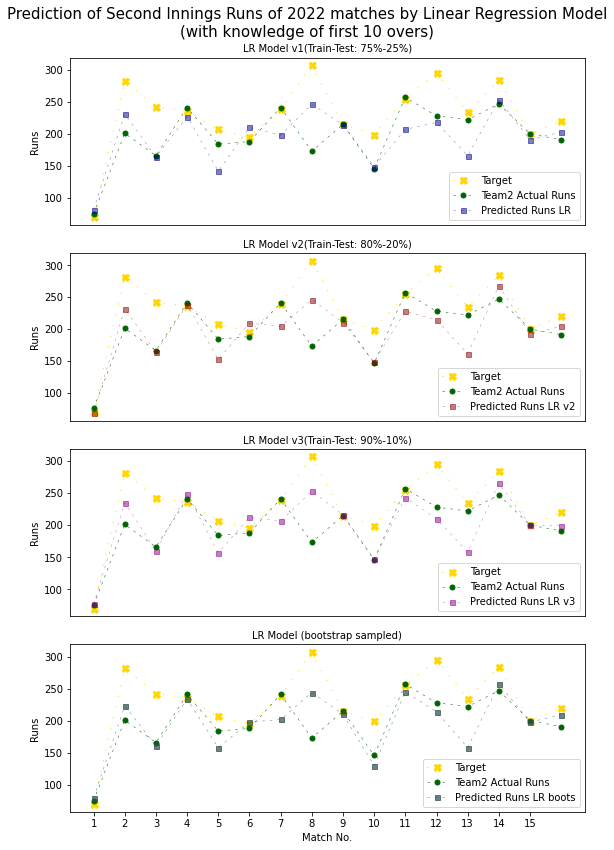

In [65]:
fig, ax =plt.subplots(4,1,figsize=(8,12))
fig.suptitle('Prediction of Second Innings Runs of 2022 matches by Linear Regression Model\n(with knowledge of first 10 overs)',
             fontsize=15)

ax[0].set_title('LR Model v1(Train-Test: 75%-25%)',
                fontsize=10)
ax[0].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[0].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[0].plot('match_id','Predicted Runs LR',data=predictions2022_v2,label="Predicted Runs LR",
         marker='s',markersize=5, color='darkblue',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[0].legend()
ax[0].set(ylabel="Runs")
ax[0].get_xaxis().set_visible(False)


ax[1].set_title('LR Model v2(Train-Test: 80%-20%)',
                fontsize=10)
ax[1].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[1].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[1].plot('match_id','Predicted Runs LR v2',data=predictions2022_v2,label="Predicted Runs LR v2",
         marker='s',markersize=5, color='darkred',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[1].legend()
ax[1].set(ylabel="Runs")
ax[1].get_xaxis().set_visible(False)


ax[2].set_title('LR Model v3(Train-Test: 90%-10%)',
                fontsize=10)
ax[2].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[2].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[2].plot('match_id','Predicted Runs LR v3',data=predictions2022_v2,label="Predicted Runs LR v3",
         marker='s',markersize=5, color='darkmagenta',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[2].legend()
ax[2].set(ylabel="Runs")
ax[2].get_xaxis().set_visible(False)


ax[3].set_title('LR Model (bootstrap sampled)',fontsize=10)
ax[3].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[3].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[3].plot('match_id','Predicted Runs LR boots',data=predictions2022_v2,label="Predicted Runs LR boots",
         marker='s',markersize=5, color='darkslategray',linewidth=0.5,alpha=0.7,linestyle=(0, (5, 10)))
ax[3].legend()
ax[3].set(xlabel="Match No.",ylabel="Runs")
ax[3].set_xticks(np.arange(202201,202216,1))
ax[3].set_xticklabels([i for i in range(1,16)])

plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/PredLRmodelv2.jpeg',bbox_inches='tight')
plt.show()

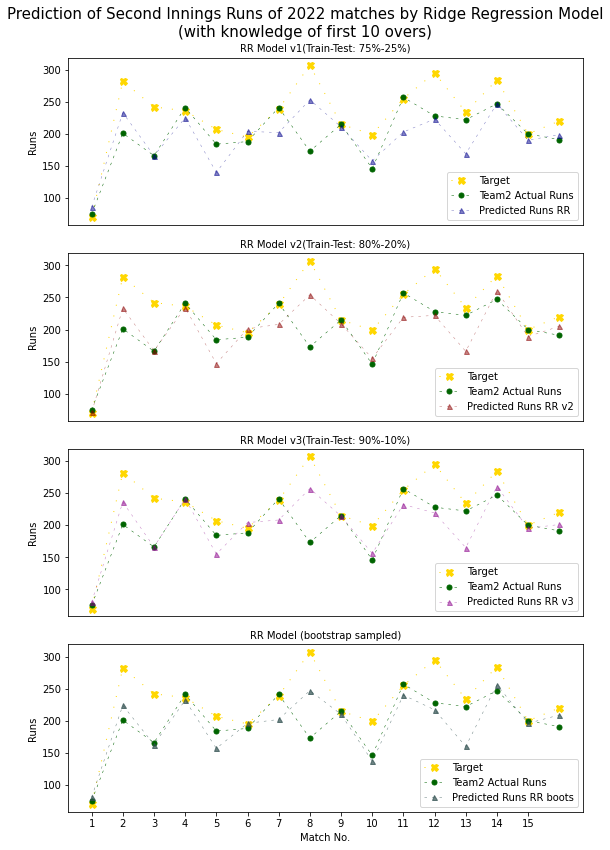

In [66]:
fig, ax =plt.subplots(4,1,figsize=(8,12))
fig.suptitle('Prediction of Second Innings Runs of 2022 matches by Ridge Regression Model\n(with knowledge of first 10 overs)',
             fontsize=15)

ax[0].set_title('RR Model v1(Train-Test: 75%-25%)',
                fontsize=10)
ax[0].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[0].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[0].plot('match_id','Predicted Runs RR',data=predictions2022_v2,label="Predicted Runs RR",
         marker='^',markersize=5, color='darkblue',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[0].legend()
ax[0].set(ylabel="Runs")
ax[0].get_xaxis().set_visible(False)


ax[1].set_title('RR Model v2(Train-Test: 80%-20%)',
                fontsize=10)
ax[1].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[1].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[1].plot('match_id','Predicted Runs RR v2',data=predictions2022_v2,label="Predicted Runs RR v2",
         marker='^',markersize=5, color='darkred',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[1].legend()
ax[1].set(ylabel="Runs")
ax[1].get_xaxis().set_visible(False)


ax[2].set_title('RR Model v3(Train-Test: 90%-10%)',
                fontsize=10)
ax[2].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[2].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[2].plot('match_id','Predicted Runs RR v3',data=predictions2022_v2,label="Predicted Runs RR v3",
         marker='^',markersize=5, color='darkmagenta',linewidth=0.5,alpha=0.5,linestyle=(0, (5, 10)))
ax[2].legend()
ax[2].set(ylabel="Runs")
ax[2].get_xaxis().set_visible(False)

ax[3].set_title('RR Model (bootstrap sampled)',fontsize=10)
ax[3].plot('match_id','Target',data=predictions2022_v2,label="Target",
         marker='X',markersize=7, color='gold',linewidth=1,linestyle=(0, (1, 10)))
ax[3].plot('match_id','Team2 Actual Runs',data=predictions2022_v2,label="Team2 Actual Runs",
         marker='o',markersize=5, color='darkgreen',linewidth=0.5,linestyle=(0, (5, 10)))
ax[3].plot('match_id','Predicted Runs RR boots',data=predictions2022_v2,label="Predicted Runs RR boots",
         marker='^',markersize=5, color='darkslategray',linewidth=0.5,alpha=0.7,linestyle=(0, (5, 10)))
ax[3].legend()
ax[3].set(xlabel="Match No.",ylabel="Runs")
ax[3].set_xticks(np.arange(202201,202216,1))
ax[3].set_xticklabels([i for i in range(1,16)])

plt.tight_layout()
plt.savefig('C:/Users/DELL/Cricdata/PredRRmodelv2.jpeg',bbox_inches='tight')
plt.show()

It was noticed that some predictions were closer to the actual values than the earlier models based on scores. There is however no major difference in the performances of the Linear and Ridge Regression models regarding predicting second innings runs. 